In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
#read data(two list relations/features )
fichier_matrice_x1 = open("/content/drive/MyDrive/PCD/data/l10000features_kmeansAE.txt", "r")
fichier_matrice_x2 = open("/content/drive/MyDrive/PCD/data/l10000relation_kmeansAE.txt", "r")

for line in fichier_matrice_x1:
  l1=list(line.split(" "))
for line in fichier_matrice_x2:
  l2=list(line.split(" "))

In [ ]:
print(l2)

['1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
#create matrix
k=5
c = np.zeros((10000,9),dtype='float')
for i in range(10000):
  c[i][int(l1[i])]=1
  c[i][int(l2[i])+k]=1

In [ ]:
#model autoencoder
input_df = Input( shape = (9, ))
x = Dense(6, activation = 'relu')(input_df)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(4, activation ='relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(6, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(9, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#training model
autoencoder.fit(c,c, batch_size= 120, epochs = 21, verbose = 1)

Epoch 1/21
84/84 [==============================] - 0s 997us/step - loss: 0.2468
Epoch 2/21
84/84 [==============================] - 0s 963us/step - loss: 0.1588
Epoch 3/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 4/21
84/84 [==============================] - 0s 999us/step - loss: 0.0489
Epoch 5/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 6/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 7/21
84/84 [==============================] - 0s 864us/step - loss: 0.0297
Epoch 8/21
84/84 [==============================] - 0s 878us/step - loss: 0.0263
Epoch 9/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 10/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 11/21
84/84 [==============================] - 0s 886us/step - loss: 0.0198
Epoch 12/21
84/84 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 13/21
84/84 [==================

In [ ]:
#predect compression data
pred_c = encoder.predict(c)

In [ ]:
#elbow method(choose the optimal k)
score_c = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred_c)
    score_c.append(kmeans.inertia_)

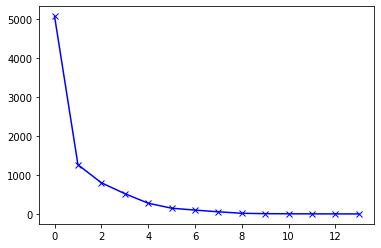

In [ ]:
plt.plot(score_c, 'bx-')

In [ ]:
#kmeans 
kmeans = KMeans(4)
kmeans.fit(pred_c)
labels_c = kmeans.labels_
silhouette_avg = silhouette_score(pred_c, labels_c)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_c, labels_c)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_c, labels_c)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

29124.585608849568
0.44522650249680806
0.7908694


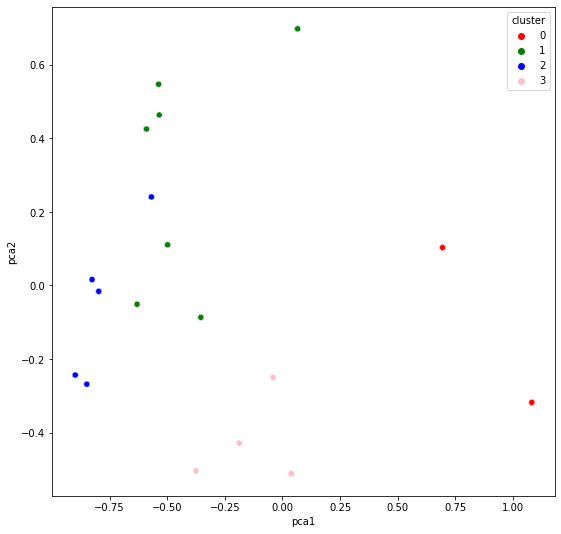

In [ ]:
# show data
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred_c)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_c})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue','pink'])
#palette = ['red','green','blue','pink','brown','yellow']